### Assignment - 1

#### 1. Load and Inspect the CMAPSS Dataset
Task:
- Write Python code to load the raw `train_FD001.txt` dataset for CMAPSS using Pandas, assign appropriate column names, and display the shape, data types, and first 5 rows of the DataFrame.
- Expected Output: DataFrame shape, info, and sample rows.

Use the link to download the dataset:
https://data.nasa.gov/dataset/cmapss-jet-engine-simulated-data

In [11]:
import numpy as np 
import pandas as pd
from pathlib import Path

# Set column names: 3 op_settings + 21 sensors
column_names = [
    "engine_id", "cycle", "op_setting_1", "op_setting_2", "op_setting_3"
] + [f"sensor_{i}" for i in range(1, 22)]

# Directory with the train files

file_path = Path("../../..") / "data" / "train_FD001.txt"

df = pd.read_csv(
    file_path, sep=r"\s+", header=None, names=column_names
)

# printing Shape of DataFram
print(df.shape)

# printing info
print(df.info())

# printing sample rows
df.head(5)


(20631, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 26 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   engine_id     20631 non-null  int64  
 1   cycle         20631 non-null  int64  
 2   op_setting_1  20631 non-null  float64
 3   op_setting_2  20631 non-null  float64
 4   op_setting_3  20631 non-null  float64
 5   sensor_1      20631 non-null  float64
 6   sensor_2      20631 non-null  float64
 7   sensor_3      20631 non-null  float64
 8   sensor_4      20631 non-null  float64
 9   sensor_5      20631 non-null  float64
 10  sensor_6      20631 non-null  float64
 11  sensor_7      20631 non-null  float64
 12  sensor_8      20631 non-null  float64
 13  sensor_9      20631 non-null  float64
 14  sensor_10     20631 non-null  float64
 15  sensor_11     20631 non-null  float64
 16  sensor_12     20631 non-null  float64
 17  sensor_13     20631 non-null  float64
 18  sensor_14     

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


#### 2. Visualize Sensor Distributions and Identify Missing Values
Task:
- Using the loaded dataset (or the cleaned version), visualize the distribution of values for any three sensor columns with histograms, and check for missing values in all columns.
- Expected Output: Three histogram plots and a summary/report on missing values per column.

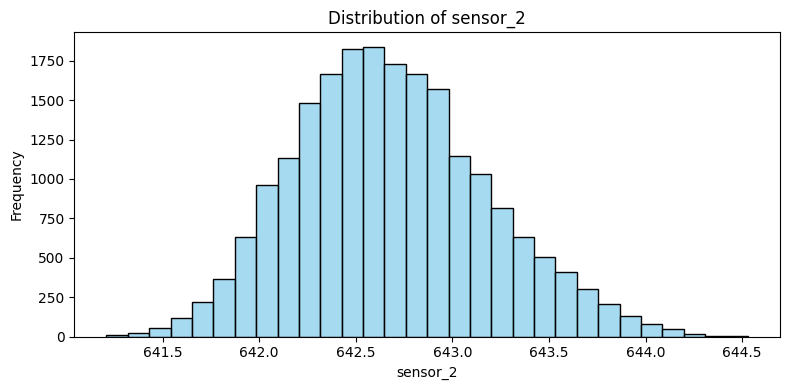

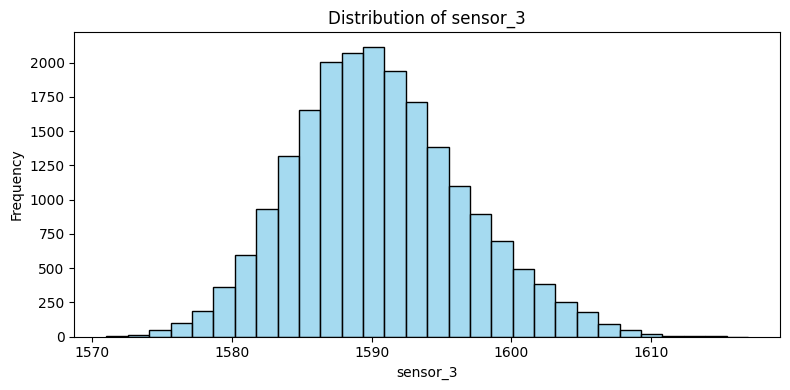

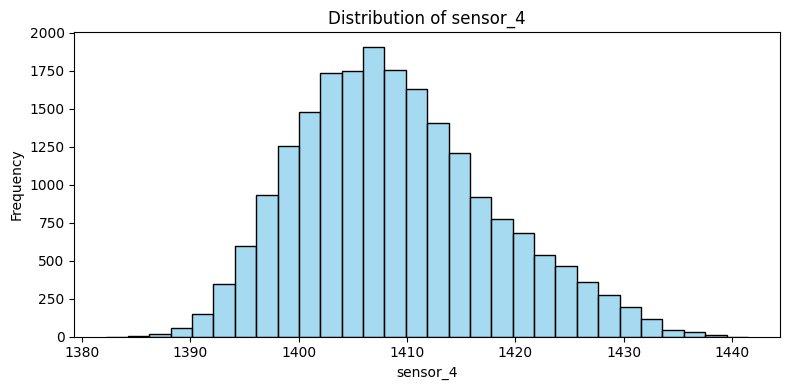

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sensor_col = ['sensor_2','sensor_3','sensor_4']
for col in sensor_col:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

In [19]:
df.isnull().sum()

engine_id       0
cycle           0
op_setting_1    0
op_setting_2    0
op_setting_3    0
sensor_1        0
sensor_2        0
sensor_3        0
sensor_4        0
sensor_5        0
sensor_6        0
sensor_7        0
sensor_8        0
sensor_9        0
sensor_10       0
sensor_11       0
sensor_12       0
sensor_13       0
sensor_14       0
sensor_15       0
sensor_16       0
sensor_17       0
sensor_18       0
sensor_19       0
sensor_20       0
sensor_21       0
dtype: int64

#### 3. Feature Engineering – Aggregation and Rolling Statistics
Task:
- For a selected sensor (e.g., `sensor_2`), compute and append to the DataFrame:
  - The mean and standard deviation of `sensor_2` by each `engine_id`

  - The rolling mean (window size=5) for each engine’s `sensor_2` readings
- Expected Output: Show a few sample rows with these new features.

In [26]:
engine_aggs = df.groupby('engine_id')['sensor_2'].agg(['mean', 'std'])
engine_aggs.columns = [''.join(col) for col in engine_aggs.columns]
engine_aggs.reset_index(inplace=True)
print(f"Aggregate feature matrix shape: {engine_aggs.shape}")
engine_aggs.tail()

Aggregate feature matrix shape: (100, 3)


,engine_id,mean,std
95,96,642.629821,0.501021
96,97,642.522624,0.473922
97,98,642.584872,0.525905
98,99,642.611081,0.502209
99,100,642.741250,0.460405


In [28]:
df['sensor_2_rollmean'] = df.groupby('engine_id')['sensor_2'].rolling(window=5, min_periods=1).mean().reset_index(level=0, drop=True)
df['sensor_2_rollstd'] = df.groupby('engine_id')['sensor_2'].rolling(window=5, min_periods=1).std().reset_index(level=0, drop=True)
df[['sensor_2','sensor_2_rollmean','sensor_2_rollstd']].head()

,sensor_2,sensor_2_rollmean,sensor_2_rollstd
0,641.82,641.820000,NaN
1,642.15,641.985000,0.233345
2,642.35,642.106667,0.267644
3,642.35,642.167500,0.250117
4,642.37,642.208000,0.234776


#### 4. Data Normalization
Task:
- Normalize all sensor columns in the DataFrame using `StandardScaler` from `scikit-learn` (zero mean, unit variance) and create a new DataFrame, maintaining the original `engine_id` and `cycle` columns.
- Expected Output: Head of the normalized DataFrame and a check that means are close to zero, std are close to one.

In [29]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

features_to_scale = [col for col in df.columns if ('sensor_'in col) or ('roll' in col)]
# StandardScaler (mean=0, std=1)
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Confirm scaled feature distribution
df_scaled[features_to_scale].describe().T[['mean', 'std']]

,mean,std
sensor_1,0.000000e+00,0.000000
sensor_2,6.410348e-14,1.000024
sensor_3,-4.959437e-14,1.000024
sensor_4,9.285169e-16,1.000024
sensor_5,-1.776357e-15,0.000000
sensor_6,-6.469426e-12,1.000024
sensor_7,-3.161641e-14,1.000024
sensor_8,1.008249e-12,1.000024
sensor_9,-4.185765e-14,1.000024
sensor_10,0.000000e+00,0.000000


In [32]:
df_scaled.head()

,engine_id,cycle,op_setting_1,op_setting_2,op_setting_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_4_rollmean5,sensor_4_rollstd5,sensor_2_rollmean,sensor_2_rollstd
0,1,1,-0.0007,-0.0004,100.0,0.0,-1.721725,-0.134255,-0.925936,-1.776357e-15,...,-1.387779e-17,-0.781710,0.0,0.0,1.348493,1.194427,-1.004816,NaN,-2.067769,NaN
1,1,2,0.0019,-0.0003,100.0,0.0,-1.061780,0.211528,-0.643726,-1.776357e-15,...,-1.387779e-17,-0.781710,0.0,0.0,1.016528,1.236922,-0.846703,-1.444528,-1.665516,-0.489727
2,1,3,-0.0043,0.0003,100.0,0.0,-0.661813,-0.413166,-0.525953,-1.776357e-15,...,-1.387779e-17,-2.073094,0.0,0.0,0.739891,0.503423,-0.750009,-1.405451,-1.368905,-0.159853
3,1,4,0.0007,0.0000,100.0,0.0,-0.661813,-1.261314,-0.784831,-1.776357e-15,...,-1.387779e-17,-0.781710,0.0,0.0,0.352598,0.777792,-0.774183,-1.615734,-1.220599,-0.328425
4,1,5,-0.0019,-0.0002,100.0,0.0,-0.621816,-1.251528,-0.301518,-1.776357e-15,...,-1.387779e-17,-0.136018,0.0,0.0,0.463253,1.059552,-0.680373,-1.181361,-1.121865,-0.475962


#### 5. Rolling Window Sequence Generation
Task:
- Write a function to generate rolling window sequences of length 30 for the sensors of each engine. Save the resulting 3D NumPy array (num_sequences, window_size, num_features), and save the corresponding engine_id and cycle identifier lists as CSV files. Print the shape of the resulting sequence array and contents of the first entry.
- Expected Output: Array shape, example content, and confirmation of successful file saves.